In [ ]:
!pip install datasets sentence-transformers faiss-cpu


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31.4/31.4 MB 25.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 60.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
from datasets import load_dataset
from itertools import islice
import random

# K√º√ß√ºk subset almak i√ßin streaming=True ve take kullanacaƒüƒ±z
dataset = load_dataset(
    "wikimedia/wikipedia",
    "20231101.en",      # Dump tarihi (Kasƒ±m 2023 ƒ∞ngilizce)
    split="train",
    streaming=True,
)

# Karƒ±≈ütƒ±rma i≈ülemi ekleyelim (streaming dataset i√ßin shuffle metodu)
#dataset = dataset.shuffle(seed=42) # to make it reproducible

# ƒ∞lk 1000 makaleyi listeye √ßekelim
dataset_small = list(islice(dataset, 1000))


print(len(dataset_small))
print(dataset_small[0].keys())
print(dataset_small[0]["text"][:500])

Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

1000
dict_keys(['id', 'url', 'title', 'text'])
Anarchism is a political philosophy and movement that is skeptical of all justifications for authority and seeks to abolish the institutions it claims maintain unnecessary coercion and hierarchy, typically including nation-states, and capitalism. Anarchism advocates for the replacement of the state with stateless societies and voluntary free associations. As a historically left-wing movement, this reading of anarchism is placed on the farthest left of the political spectrum, usually described as


In [ ]:
import nltk, uuid

nltk.download("punkt")
nltk.download("punkt_tab")  # yeni eklenen paket
from nltk.tokenize import sent_tokenize

def chunk_text(text, max_tokens=250):
    sentences = sent_tokenize(text)
    chunks, current_chunk, current_tokens = [], [], 0

    for sent in sentences:
        tokens = sent.split()
        if current_tokens + len(tokens) > max_tokens:
            chunks.append(" ".join(current_chunk))
            current_chunk, current_tokens = [], 0
        current_chunk.append(sent)
        current_tokens += len(tokens)
    if current_chunk:
        chunks.append(" ".join(current_chunk))
    return chunks

chunked_data = []
for doc in dataset_small:
    for i, chunk in enumerate(chunk_text(doc['text'])):
        chunked_data.append({
            "chunk_id": str(uuid.uuid4()),
            "doc_id": doc['id'],
            "title": doc['title'],
            "text": chunk,
            "source": doc['url'],
            "chunk_idx": i
        })

print(f"Toplam chunk sayƒ±sƒ±: {len(chunked_data)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Toplam chunk sayƒ±sƒ±: 15502


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

# 1. Ba≈ülƒ±k listesi
titles = sorted(set([c["title"] for c in chunked_data]))
print(f"Toplam {len(titles)} benzersiz ba≈ülƒ±k var.")

# 2. Embedding
model = SentenceTransformer("all-MiniLM-L6-v2")
title_embeddings = model.encode(titles, normalize_embeddings=True, show_progress_bar=True)

Toplam 1000 benzersiz ba≈ülƒ±k var.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


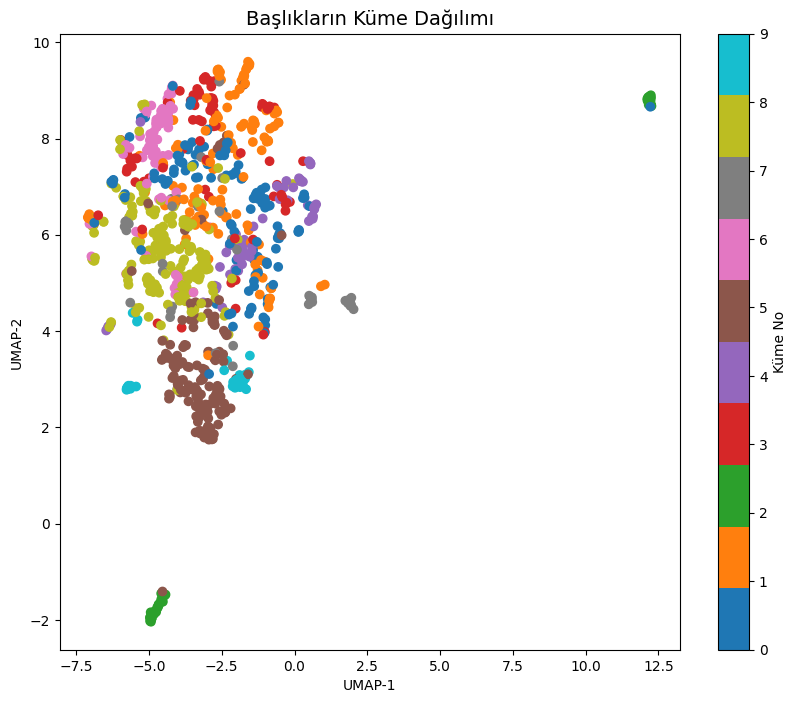


K√ºme 0 (128 ba≈ülƒ±k):
 - A Fire Upon the Deep  |  https://en.wikipedia.org/wiki/A%20Fire%20Upon%20the%20Deep
 - A Modest Proposal  |  https://en.wikipedia.org/wiki/A%20Modest%20Proposal
 - AFC Ajax  |  https://en.wikipedia.org/wiki/AFC%20Ajax
 - AS Roma  |  https://en.wikipedia.org/wiki/AS%20Roma
 - Aachen  |  https://en.wikipedia.org/wiki/Aachen
 - Abbey  |  https://en.wikipedia.org/wiki/Abbey
 - Abbotsford, Scottish Borders  |  https://en.wikipedia.org/wiki/Abbotsford%2C%20Scottish%20Borders
 - Aberdeen  |  https://en.wikipedia.org/wiki/Aberdeen
 - Aberdeen (disambiguation)  |  https://en.wikipedia.org/wiki/Aberdeen%20%28disambiguation%29
 - Aberdeenshire  |  https://en.wikipedia.org/wiki/Aberdeenshire

K√ºme 1 (146 ba≈ülƒ±k):
 - A  |  https://en.wikipedia.org/wiki/A
 - A Clockwork Orange (novel)  |  https://en.wikipedia.org/wiki/A%20Clockwork%20Orange%20%28novel%29
 - A cappella  |  https://en.wikipedia.org/wiki/A%20cappella
 - A360media  |  https://en.wikipedia.org/wiki/A360medi

In [ ]:




# 3. Boyut indirgeme (UMAP daha net k√ºmeler √ßƒ±karƒ±r)
reducer = umap.UMAP(random_state=42, n_neighbors=10, min_dist=0.1)
embedding_2d = reducer.fit_transform(title_embeddings)

# 4. K-Means k√ºmeleme
n_clusters = 10  # isteƒüe g√∂re deƒüi≈ütirilebilir
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(title_embeddings)

title2url = {}
for c in chunked_data:
    if c["title"] not in title2url:
        title2url[c["title"]] = c.get("source", "")

# (ƒ∞steƒüe baƒülƒ±) 20 k√ºme i√ßin daha uygun renk paleti
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap="tab10")
plt.title("Ba≈ülƒ±klarƒ±n K√ºme Daƒüƒ±lƒ±mƒ±", fontsize=14)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(scatter, label="K√ºme No")
plt.show()

# K√ºme i√ßeriklerini URL ile yazdƒ±r
from collections import defaultdict
clusters = defaultdict(list)
for title, label in zip(titles, cluster_labels):
    clusters[label].append(title)

for label in sorted(clusters.keys()):
    print(f"\nK√ºme {label} ({len(clusters[label])} ba≈ülƒ±k):")
    for t in clusters[label][:10]:
        url = title2url.get(t, "")
        print(f" - {t}  |  {url}")

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


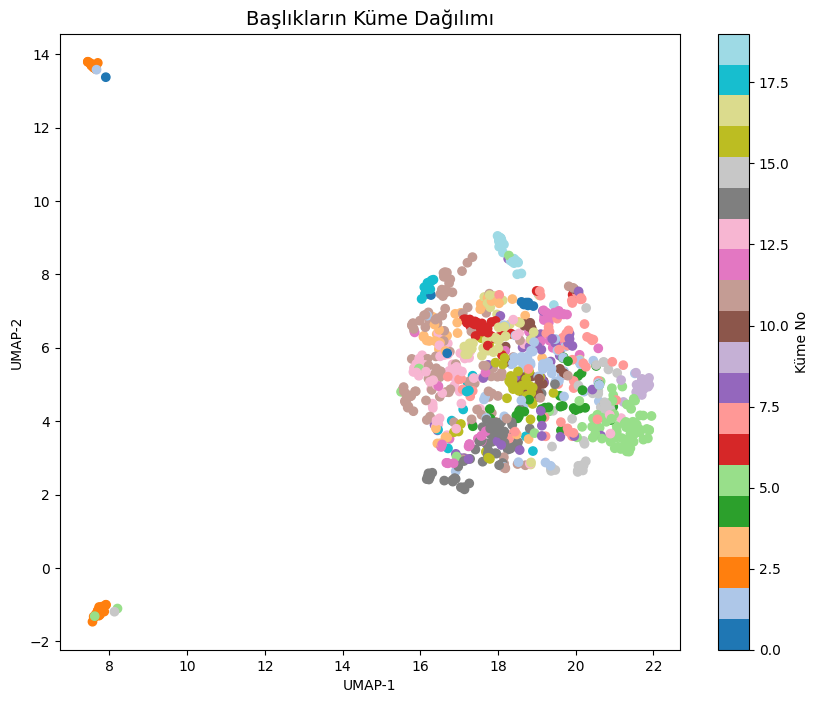


K√ºme 0 (11 ba≈ülƒ±k):
 - Alessandro Allori  |  https://en.wikipedia.org/wiki/Alessandro%20Allori
 - All Souls' Day  |  https://en.wikipedia.org/wiki/All%20Souls%27%20Day
 - Allegory  |  https://en.wikipedia.org/wiki/Allegory
 - Allele  |  https://en.wikipedia.org/wiki/Allele
 - Allocution  |  https://en.wikipedia.org/wiki/Allocution
 - Allomorph  |  https://en.wikipedia.org/wiki/Allomorph
 - Allophone  |  https://en.wikipedia.org/wiki/Allophone
 - Allosaurus  |  https://en.wikipedia.org/wiki/Allosaurus
 - Allotropy  |  https://en.wikipedia.org/wiki/Allotropy
 - Almost all  |  https://en.wikipedia.org/wiki/Almost%20all

K√ºme 1 (65 ba≈ülƒ±k):
 - ALF Tales  |  https://en.wikipedia.org/wiki/ALF%20Tales
 - AVL tree  |  https://en.wikipedia.org/wiki/AVL%20tree
 - Acapulco  |  https://en.wikipedia.org/wiki/Acapulco
 - Achaeans (Homer)  |  https://en.wikipedia.org/wiki/Achaeans%20%28Homer%29
 - Achilles  |  https://en.wikipedia.org/wiki/Achilles
 - Actaeon  |  https://en.wikipedia.org/wiki/

In [ ]:

# 3. Boyut indirgeme (UMAP daha net k√ºmeler √ßƒ±karƒ±r)
reducer = umap.UMAP(random_state=42, n_neighbors=20, min_dist=0.1)
embedding_2d = reducer.fit_transform(title_embeddings)

# 4. K-Means k√ºmeleme
n_clusters = 20  # isteƒüe g√∂re deƒüi≈ütirilebilir
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(title_embeddings)
# --- Ba≈ülƒ±k -> URL haritasƒ± (ilk g√∂r√ºlen URL'yi al)
title2url = {}
for c in chunked_data:
    if c["title"] not in title2url:
        title2url[c["title"]] = c.get("source", "")

# (ƒ∞steƒüe baƒülƒ±) 20 k√ºme i√ßin daha uygun renk paleti
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap="tab20")
plt.title("Ba≈ülƒ±klarƒ±n K√ºme Daƒüƒ±lƒ±mƒ±", fontsize=14)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(scatter, label="K√ºme No")
plt.show()

# K√ºme i√ßeriklerini URL ile yazdƒ±r
from collections import defaultdict
clusters = defaultdict(list)
for title, label in zip(titles, cluster_labels):
    clusters[label].append(title)

for label in sorted(clusters.keys()):
    print(f"\nK√ºme {label} ({len(clusters[label])} ba≈ülƒ±k):")
    for t in clusters[label][:10]:
        url = title2url.get(t, "")
        print(f" - {t}  |  {url}")

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


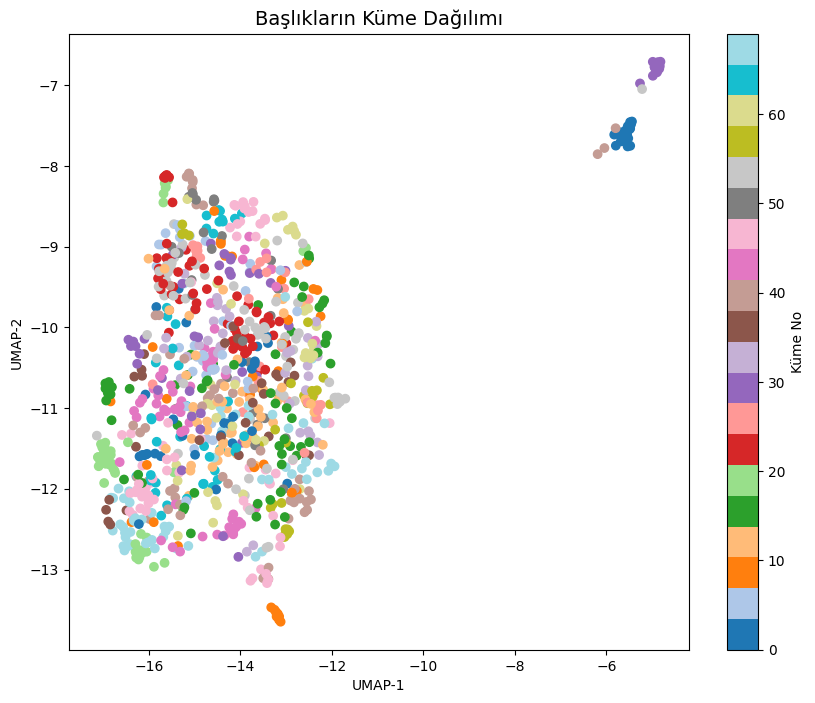


K√ºme 0 (8 ba≈ülƒ±k):
 - Allegory  |  https://en.wikipedia.org/wiki/Allegory
 - Allele  |  https://en.wikipedia.org/wiki/Allele
 - Allocution  |  https://en.wikipedia.org/wiki/Allocution
 - Allomorph  |  https://en.wikipedia.org/wiki/Allomorph
 - Allophone  |  https://en.wikipedia.org/wiki/Allophone
 - Allosaurus  |  https://en.wikipedia.org/wiki/Allosaurus
 - Allotropy  |  https://en.wikipedia.org/wiki/Allotropy
 - Almost all  |  https://en.wikipedia.org/wiki/Almost%20all

K√ºme 1 (14 ba≈ülƒ±k):
 - Aedile  |  https://en.wikipedia.org/wiki/Aedile
 - Aeneas  |  https://en.wikipedia.org/wiki/Aeneas
 - Aeolus  |  https://en.wikipedia.org/wiki/Aeolus
 - Aeon  |  https://en.wikipedia.org/wiki/Aeon
 - Aeschylus  |  https://en.wikipedia.org/wiki/Aeschylus
 - Agesilaus II  |  https://en.wikipedia.org/wiki/Agesilaus%20II
 - Alaric I  |  https://en.wikipedia.org/wiki/Alaric%20I
 - Alaric II  |  https://en.wikipedia.org/wiki/Alaric%20II
 - Alarums and Excursions  |  https://en.wikipedia.org/wiki

In [ ]:

# 3. Boyut indirgeme (UMAP daha net k√ºmeler √ßƒ±karƒ±r)
reducer = umap.UMAP(random_state=42, n_neighbors=70, min_dist=0.1)
embedding_2d = reducer.fit_transform(title_embeddings)

# 4. K-Means k√ºmeleme
n_clusters = 70  # isteƒüe g√∂re deƒüi≈ütirilebilir
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(title_embeddings)
# --- Ba≈ülƒ±k -> URL haritasƒ± (ilk g√∂r√ºlen URL'yi al)
title2url = {}
for c in chunked_data:
    if c["title"] not in title2url:
        title2url[c["title"]] = c.get("source", "")

# (ƒ∞steƒüe baƒülƒ±) 20 k√ºme i√ßin daha uygun renk paleti
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap="tab20")
plt.title("Ba≈ülƒ±klarƒ±n K√ºme Daƒüƒ±lƒ±mƒ±", fontsize=14)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(scatter, label="K√ºme No")
plt.show()

# K√ºme i√ßeriklerini URL ile yazdƒ±r
from collections import defaultdict
clusters = defaultdict(list)
for title, label in zip(titles, cluster_labels):
    clusters[label].append(title)

for label in sorted(clusters.keys()):
    print(f"\nK√ºme {label} ({len(clusters[label])} ba≈ülƒ±k):")
    for t in clusters[label][:10]:
        url = title2url.get(t, "")
        print(f" - {t}  |  {url}")

In [ ]:
from sentence_transformers import SentenceTransformer
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = SentenceTransformer("all-MiniLM-L6-v2", device=device)

texts = [c["text"] for c in chunked_data]
embeddings = model.encode(
    texts,
    normalize_embeddings=True,
    batch_size=64,
    show_progress_bar=True,
    device=device
)

Using device: cuda


Batches:   0%|          | 0/243 [00:00<?, ?it/s]

In [ ]:
import faiss
import numpy as np
import json

# FAISS index (cosine)
dim = embeddings.shape[1]
index = faiss.IndexFlatIP(dim)
index.add(embeddings)

# Kaydet
faiss.write_index(index, "faiss_index.bin")
with open("chunks.json", "w") as f:
    json.dump(chunked_data, f)

In [ ]:
# √ñrnek sorgu
query = "What is the date of the Apollo 11 moon landing?"
q_emb = model.encode([query], normalize_embeddings=True)
chunks = chunked_data
# FAISS arama
scores, idxs = index.search(q_emb, 5)

# Sonu√ßlarƒ± yazdƒ±r
for score, idx in zip(scores[0], idxs[0]):
    print(f"Score: {score:.4f}")
    print(f"Title: {chunks[idx]['title']}")
    print(f"Text: {chunks[idx]['text'][:200]}...")
    print(f"Source: {chunks[idx]['source']}\n")

Score: 0.6106
Title: Apollo 11
Text: Apollo 11 (July 16‚Äì24, 1969) was the American spaceflight that first landed humans on the Moon. Commander Neil Armstrong and Lunar Module Pilot Buzz Aldrin landed the Apollo Lunar Module Eagle on July...
Source: https://en.wikipedia.org/wiki/Apollo%2011

Score: 0.5877
Title: Apollo 11
Text: Sources

External links 

 "Apollo 11 transcripts" at Spacelog
 Apollo 11 in real time
 Apollo 11 Press Conference filmed by KPRC-TV at Texas Archive of the Moving Image
 Apollo 11 and 13 Checklists a...
Source: https://en.wikipedia.org/wiki/Apollo%2011

Score: 0.5851
Title: Apollo 14
Text: Apollo 14 (January 31February 9, 1971) was the eighth crewed mission in the United States Apollo program, the third to land on the Moon, and the first to land in the lunar highlands. It was the last o...
Source: https://en.wikipedia.org/wiki/Apollo%2014

Score: 0.5675
Title: Apollo 11
Text: After being sent to the Moon by the Saturn V's third stage, the astronauts separated 

In [ ]:
import numpy as np
import random

# 1. Tek sorgu testi
def test_single_query(query, k=5):
    print(f"\nüîç Query: {query}")
    q_emb = model.encode([query], normalize_embeddings=True)
    scores, idxs = index.search(q_emb, k)
    for rank, (score, idx) in enumerate(zip(scores[0], idxs[0]), start=1):
        print(f"\n#{rank} | Score: {score:.4f}")
        print(f"Title: {chunks[idx]['title']}")
        print(f"Text: {chunks[idx]['text'][:200]}...")
        print(f"Source: {chunks[idx]['source']}")

# 2. Birden fazla sorgu testi
def test_multiple_queries(queries, k=5):
    for q in queries:
        test_single_query(q, k)

# 3. Rastgele dok√ºman testi
def test_random_doc(num_samples=3):
    print(f"\nüéØ Rastgele {num_samples} dok√ºman se√ßiliyor...")
    for c in random.sample(chunks, num_samples):
        print(f"\nTitle: {c['title']}")
        print(f"Text: {c['text'][:200]}...")
        print(f"Source: {c['source']}")

# 4. Recall@K testi (k√º√ß√ºk set i√ßin manuel)
def recall_at_k(test_queries, k=5):
    """
    test_queries: [{'query': '...', 'target_titles': ['Title1', 'Title2']}]
    """
    total = len(test_queries)
    hits = 0
    for tq in test_queries:
        q_emb = model.encode([tq['query']], normalize_embeddings=True)
        scores, idxs = index.search(q_emb, k)
        retrieved_titles = [chunks[i]['title'] for i in idxs[0]]
        if any(t in retrieved_titles for t in tq['target_titles']):
            hits += 1
    recall = hits / total
    print(f"\nüìä Recall@{k}: {recall:.2%} ({hits}/{total})")
    return recall

In [ ]:
# 1. Tek sorgu
test_single_query("What is the date of the Apollo 11 moon landing?", k=5)

# 2. Birden fazla sorgu
queries = [
    "History of artificial intelligence",
    "Space exploration missions",
    "Climate change effects"
]
test_multiple_queries(queries, k=5)

# 3. Rastgele dok√ºman √∂rnekleme
test_random_doc(num_samples=3)

# 4. Recall@K (elle belirlenen mini test set)
test_set = [
    {"query": "Machine learning applications", "target_titles": ["Machine learning"]},
    {"query": "Apollo moon landing", "target_titles": ["Apollo 11"]},
    {"query": "Shakespeare plays", "target_titles": ["William Shakespeare"]}
]
recall_at_k(test_set, k=5)


üîç Query: What is the date of the Apollo 11 moon landing?

#1 | Score: 0.6106
Title: Apollo 11
Text: Apollo 11 (July 16‚Äì24, 1969) was the American spaceflight that first landed humans on the Moon. Commander Neil Armstrong and Lunar Module Pilot Buzz Aldrin landed the Apollo Lunar Module Eagle on July...
Source: https://en.wikipedia.org/wiki/Apollo%2011

#2 | Score: 0.5877
Title: Apollo 11
Text: Sources

External links 

 "Apollo 11 transcripts" at Spacelog
 Apollo 11 in real time
 Apollo 11 Press Conference filmed by KPRC-TV at Texas Archive of the Moving Image
 Apollo 11 and 13 Checklists a...
Source: https://en.wikipedia.org/wiki/Apollo%2011

#3 | Score: 0.5851
Title: Apollo 14
Text: Apollo 14 (January 31February 9, 1971) was the eighth crewed mission in the United States Apollo program, the third to land on the Moon, and the first to land in the lunar highlands. It was the last o...
Source: https://en.wikipedia.org/wiki/Apollo%2014

#4 | Score: 0.5675
Title: Apollo 11
Text: Aft

0.3333333333333333

In [ ]:
# corpus: chunked_data (title, text, source, chunk_idx)
# section bilgisi yoksa sadece title kullan
def enrich_chunk(c):
    enriched = f"{c['title']}\n{c['text']}"
    return {**c, "enriched_text": enriched}

enriched_chunks = [enrich_chunk(c) for c in chunked_data]

# yeniden embed et
texts = [c["enriched_text"] for c in enriched_chunks]
emb = model.encode(texts, normalize_embeddings=True, batch_size=64, show_progress_bar=True)
dim = emb.shape[1]
index = faiss.IndexFlatIP(dim)
index.add(emb)

Batches:   0%|          | 0/469 [00:00<?, ?it/s]

In [ ]:
from collections import defaultdict
titles = defaultdict(int)
for c in enriched_chunks:
    titles[c["title"]] += 1

# corpus'ta ger√ßekten bulunan, yeterince chunk'ƒ± olan ba≈ülƒ±klarƒ± se√ß
candidate_titles = [t for t, n in titles.items() if n >= 3][:30]  # √∂rn. ilk 30

def gen_queries_for_title(title):
    return [
        f"What is {title}?",
        f"Explain {title} in simple terms.",
        f"Overview and key points of {title}.",
    ]

title_queries = []
for t in candidate_titles:
    for q in gen_queries_for_title(t):
        title_queries.append({"query": q, "target_title": t})

In [ ]:
# manuel e≈üle≈ütirme: her doƒüru title'a bir "kafa karƒ±≈ütƒ±rƒ±cƒ±" yakƒ±n-yanlƒ±≈ü title
# pratik: aynƒ± ilk harfle ba≈ülayan ama farklƒ± alanlar ("Java" √∂rneƒüi gibi)
adversarial_pairs = [
    ("Apollo 11", "Sid Meier's Alpha Centauri"),
    ("Java (programming language)", "Java"),
    ("Quantum computing", "Algorithm"),
]
adv_queries = [{"query": f"Details about {a[0]} missions", "avoid_title": a[1], "target_title": a[0]} for a in adversarial_pairs]

In [ ]:
def search_topk(q, k=5):
    q_emb = model.encode([q], normalize_embeddings=True)
    scores, idxs = index.search(q_emb, k)
    return scores[0], idxs[0]

def eval_title_bucket(pairs, k=5):
    hits = 0
    for ex in pairs:
        _, idxs = search_topk(ex["query"], k)
        top_titles = [enriched_chunks[i]["title"] for i in idxs]
        if ex["target_title"] in top_titles:
            hits += 1
    recall = hits / len(pairs)
    print(f"Title-bucket Recall@{k}: {recall:.2%} ({hits}/{len(pairs)})")
    return recall

def eval_adversarial_bucket(pairs, k=5):
    # ba≈üarƒ± kriteri: "avoid_title" ilk K i√ßinde OLMAMALI + target_title tercihen bulunmalƒ± (iki metriƒüi de yaz)
    avoid_hits, target_hits = 0, 0
    for ex in pairs:
        _, idxs = search_topk(ex["query"], k)
        top_titles = [enriched_chunks[i]["title"] for i in idxs]
        if ex["avoid_title"] in top_titles:
            avoid_hits += 1
        if ex.get("target_title") and ex["target_title"] in top_titles:
            target_hits += 1
    print(f"Adversarial (avoid) rate in Top@{k}: {(avoid_hits/len(pairs)):.2%}  (d√º≈ü√ºk olmalƒ±)")
    print(f"Adversarial (target) Recall@{k}: {(target_hits/len(pairs)):.2%}")
    return (avoid_hits/len(pairs)), (target_hits/len(pairs))

In [ ]:
def search_topk(q, k=5):
    q_emb = model.encode([q], normalize_embeddings=True)
    scores, idxs = index.search(q_emb, k)
    return scores[0], idxs[0]

def eval_title_bucket(pairs, k=5):
    hits = 0
    for ex in pairs:
        _, idxs = search_topk(ex["query"], k)
        top_titles = [enriched_chunks[i]["title"] for i in idxs]
        if ex["target_title"] in top_titles:
            hits += 1
    recall = hits / len(pairs)
    print(f"Title-bucket Recall@{k}: {recall:.2%} ({hits}/{len(pairs)})")
    return recall

def eval_adversarial_bucket(pairs, k=5):
    # ba≈üarƒ± kriteri: "avoid_title" ilk K i√ßinde OLMAMALI + target_title tercihen bulunmalƒ± (iki metriƒüi de yaz)
    avoid_hits, target_hits = 0, 0
    for ex in pairs:
        _, idxs = search_topk(ex["query"], k)
        top_titles = [enriched_chunks[i]["title"] for i in idxs]
        if ex["avoid_title"] in top_titles:
            avoid_hits += 1
        if ex.get("target_title") and ex["target_title"] in top_titles:
            target_hits += 1
    print(f"Adversarial (avoid) rate in Top@{k}: {(avoid_hits/len(pairs)):.2%}  (d√º≈ü√ºk olmalƒ±)")
    print(f"Adversarial (target) Recall@{k}: {(target_hits/len(pairs)):.2%}")
    return (avoid_hits/len(pairs)), (target_hits/len(pairs))

In [ ]:
# 1. Title-bucket testi
print("=== TITLE BUCKET TEST ===")
title_recall = eval_title_bucket(title_queries, k=5)

# 2. Adversarial bucket testi
print("\n=== ADVERSARIAL BUCKET TEST ===")
adv_avoid_rate, adv_target_recall = eval_adversarial_bucket(adv_queries, k=5)

=== TITLE BUCKET TEST ===
Title-bucket Recall@5: 98.89% (89/90)

=== ADVERSARIAL BUCKET TEST ===
Adversarial (avoid) rate in Top@5: 33.33%  (d√º≈ü√ºk olmalƒ±)
Adversarial (target) Recall@5: 33.33%


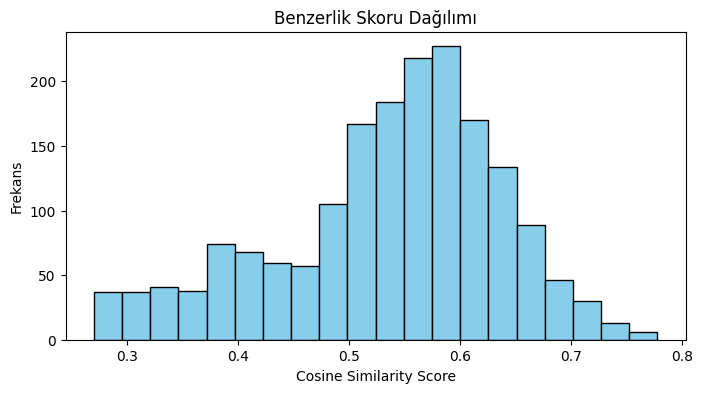

In [ ]:
import matplotlib.pyplot as plt

def plot_score_distribution(queries, k=20):
    all_scores = []
    for ex in queries:
        scores, _ = search_topk(ex["query"], k)
        all_scores.extend(scores)
    plt.figure(figsize=(8,4))
    plt.hist(all_scores, bins=20, color="skyblue", edgecolor="black")
    plt.title("Benzerlik Skoru Daƒüƒ±lƒ±mƒ±")
    plt.xlabel("Cosine Similarity Score")
    plt.ylabel("Frekans")
    plt.show()

plot_score_distribution(title_queries)

In [ ]:
import pandas as pd

results_summary = pd.DataFrame([
    {"Bucket": "Title Recall@5", "Value": title_recall},
    {"Bucket": "Adversarial Avoid Rate@5", "Value": adv_avoid_rate},
    {"Bucket": "Adversarial Target Recall@5", "Value": adv_target_recall}
])
print("\n=== SONU√á √ñZETƒ∞ ===")
print(results_summary)


=== SONU√á √ñZETƒ∞ ===
                        Bucket     Value
0               Title Recall@5  0.988889
1     Adversarial Avoid Rate@5  0.333333
2  Adversarial Target Recall@5  0.333333


In [ ]:
import pandas as pd

# AG News: 4 sƒ±nƒ±f (0=World, 1=Sports, 2=Business, 3=Sci/Tech)
raw = load_dataset("ag_news")

# Dengeli k√º√ß√ºk set: her sƒ±nƒ±ftan N √∂rnek (√∂rn. 500)
N_PER_CLASS = 500
df_train = pd.DataFrame(raw["train"])
label_names = {0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"}

balanced = []
for lab in range(4):
    sub = df_train[df_train["label"]==lab].sample(N_PER_CLASS, random_state=42)
    sub = sub.assign(label_name=label_names[lab])
    balanced.append(sub)
df = pd.concat(balanced, ignore_index=True).reset_index(drop=True)
len(df), df.label.value_counts()

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

(2000,
 label
 0    500
 1    500
 2    500
 3    500
 Name: count, dtype: int64)

In [ ]:
df.head()

text  label label_name
0  Explosion Rocks Baghdad Neighborhood BAGHDAD, ...      0      World
1  BBC reporters' log BBC correspondents record e...      0      World
2  Israel welcomes Rice nomination; Palestinians ...      0      World
3  Medical Journal Calls for a New Drug Watchdog ...      0      World
4  Militants Kidnap Relatives of Iraqi Minister-T...      0      World

In [ ]:
import uuid

def build_docs(df):
    docs = []
    for i, row in df.iterrows():
        doc_id = str(uuid.uuid4())
        title, text, label, label_name = row["title"], row["text"], row["label"], row["label_name"]
        combined = f"{title}\n{text}"   # ba≈ülƒ±k sinyali + i√ßerik
        docs.append({
            "doc_id": doc_id,
            "title": title,
            "body": text,
            "text": combined,
            "topic": label_name,
            "source": f"ag_news/train/{i}"
        })
    return docs

docs = build_docs(df)
len(docs), docs[0]

KeyError: 'title'

In [ ]:
print(df.columns)